In [2]:
# Data Pre-processing

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dset=pd.read_csv(r"C:\Users\rajin\Desktop\Python ML Internship\Employee_Salary_Data.csv")
dset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
# Retrieving independent variables (X) and dependent variables (y) all the rows with specific columns
# iloc[range_of_rows, range_of_columns]

# years of experience  --> independent (dataframe)
X=dset.iloc[:, :-1].values

# salary  --> dependent (series)
y=dset.iloc[:, -1].values

In [23]:
# Splitting the dataset into training and testing data
# using SciKit-Learn (Scientific Kit and learning library)library --> gives Machine Learning models in python
# sklearn module--> submodule model_selection --> class train_test_split
# this divides the entire data into 4 parts i.e. Xtrain, Xtest, ytrain, ytest
# test_size=1/3 or 33.33% of entire data
# --> 33.33% of 30 rows = any 10 rows of the dataset can be chosen as the testing data
# and rest 20 rows are taken in training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=1/3, random_state=0)


In [26]:
print(X_train, y_train)     # 20 values

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] [ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


In [27]:
print(X_test, y_test)   # 10 rows

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]] [ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


In [29]:
# Training the simple Linear Regression Model on Training data

from sklearn.linear_model import LinearRegression

# Create an object of the class LinearRegression class
# the object is named as 'regressor' and the constructor of LinearRegression class is called
# this object is used to train the data set

regressor=LinearRegression()

# now using the fit() method of the LinearRegression class
# the machine learns the training data of x and y
# fit() method links the regressor object with the training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

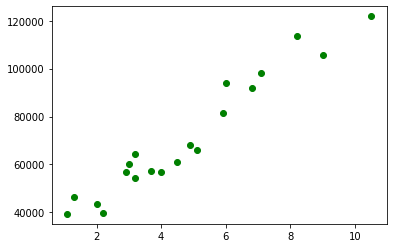

In [32]:
# Visualise the results of training data
# Plot a scatter plot out of training data

plt.scatter(X_train, y_train, color='g')
plt.show()

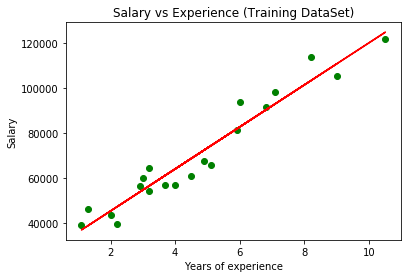

In [35]:
# To create the line of best fit/ trend line/ regressor line 
# in the scatter plot which is at min distance from all the data points
# the lines joining the corresponding predicted points by the machine
# X_train is taken common

plt.scatter(X_train, y_train, color='g')
# In the line chart we take the corresponding predicted values
# done using regressor.predict() method --> values predicted by the machine against the training x data

plt.plot(X_train, regressor.predict(X_train), color='r')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Training DataSet)')
plt.show()

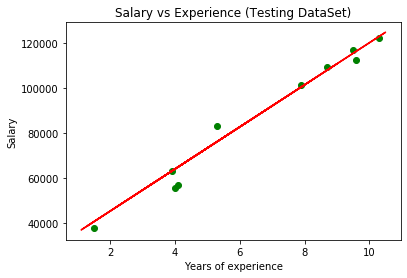

In [38]:
# Visualise the results of testing data
# Scatter plot will show the real salaries from the testing dataset
plt.scatter(X_test, y_test, color='g')

# Now we have to plot the line plot of the training data predicted by machine
# and check if it works well in the same way for the testing data also
plt.plot(X_train, regressor.predict(X_train), color='r')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Testing DataSet)')
plt.show()

In [40]:
# After training and testing, we have to predict for new values of y for x
ypred1=regressor.predict([[4]])
print(ypred1)

ypred2=regressor.predict([[7]])
print(ypred2)

[64199.96201652]
[92237.78934589]


In [41]:
# predicting the values for the entire testing data
ypred3=regressor.predict(X_test)
print(ypred3)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [43]:
# predicting for the entire dataset
ypred_all=regressor.predict(X)
print(ypred_all)

[ 37096.72893147  38965.91742009  40835.10590871  45508.07713028
  47377.2656189   53919.42532909  54854.0195734   56723.20806202
  56723.20806202  61396.17928358  63265.36777221  64199.96201652
  64199.96201652  65134.55626083  68872.93323808  72611.31021533
  74480.49870396  76349.68719258  81957.25265845  82891.84690277
  90368.60085726  93172.3835902  100649.1375447  103452.92027763
 108125.8914992  110929.67423213 115602.64545369 116537.23969801
 123079.39940819 124948.58789682]


In [46]:
# To get the values of coefficients in the Linear Regression Equation
# y=m.x+c    or   y=B0+B1.x

print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.19224403119


In [47]:
# Final equation of the simple linear regression model is:
# y=m.x+c
# y(Salary) = regressor.coef_ . x(years of experience) + regressor.intercept_
# y = 9345.92 * x + 26816.192

In [55]:
# Model evaluation
# R-squared error
print('R squared :{:.2f}'.format(regressor.score(X,y)))

R squared :0.96


In [64]:
from sklearn.metrics import mean_squared_error, r2_score

# calculating MSE
# y --- original values
# yped_all --- predicted values
mse=mean_squared_error(y, ypred_all)
print(f"MSE: {mse}")

r_squared=r2_score(y, ypred_all)
print(f"R-squared error: {r_squared}")
print(f"Slope(m): {regressor.coef_[0]}")
print(f"Intercept(c): {regressor.intercept_}")

MSE: 31577311.6194268
R-squared error: 0.9565349708076958
Slope(m): 9345.94244312237
Intercept(c): 26816.19224403119


In [66]:
# r square value on testing data
regressor.score(X_test, y_test)*100   

97.49154407708353

In [8]:
# Optimisation using Gradient Descent
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dset=pd.read_csv(r"C:\Users\rajin\Desktop\Python ML Internship\Employee_Salary_Data.csv")
X=dset.iloc[:, 0]
y=dset.iloc[:, 1]

In [14]:
# Initialize the parameters
m=0.0
c=0.0
alpha=0.01 #(we will reduce it as we are going to descent)
iterations=10000
N=len(y)   # no of data points/observations (salary)

In [15]:
# Gradient Descent Algorithm
# this is applied on entire dataset
for _ in range(iterations):  
    ypred=m*X+c
    dm=(-2/N)*np.sum(X*(y-ypred))
    dc=(-2/N)*np.sum(y-ypred)
    # update the values of m,c
    m=m-alpha*dm
    c=c-alpha*dc
    
m,c

(9449.962321455143, 25792.20019866825)

In [17]:
# Making predictions
def predict(yrs_of_exp):
    return m*yrs_of_exp+c     # y=mx+c

pred_sal=predict(4)
pred_sal # 64199 (OLS) --> companies money is saved

63592.04948448882

In [19]:
yactual=np.array([45000,50000,60000,65000,70000])
ypred=np.array([46000,51000,59000,64000,71000])

mse=np.mean((yactual-ypred)**2)
print("Mean squared error:\n", mse)

Mean squared error:
 1000000.0


In [38]:
import math
pred_salary=m*X+c
r_squared=1-(np.sum((y-pred_salary)**2)/np.sum((y-np.mean(y))**2))
print(r_squared*100)

mse=np.mean((y-pred_salary)**2)
print(mse)

95.69566641435085
31270951.72228094


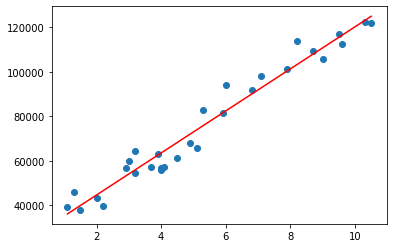

In [41]:
ypred=m*X+c
# minx is plotted corresponding to ypred
plt.scatter(X,y)
plt.plot([min(X), max(X)], [min(ypred), max(ypred)], color='r')
plt.show()